<a href="https://colab.research.google.com/github/varshithpilli/ml_projects/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.out(x)

      return x

In [ ]:
torch.manual_seed(69)
model = Model()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

<ipython-input-10-3d3e6cc10ae1>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


In [ ]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
X = my_df.drop('variety', axis=1)
y = my_df['variety']
X = X.values
y = y.values

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 300
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 0.07119587063789368
Epoch: 10 and loss: 0.0673217847943306
Epoch: 20 and loss: 0.06459768116474152
Epoch: 30 and loss: 0.0625811368227005
Epoch: 40 and loss: 0.061015330255031586
Epoch: 50 and loss: 0.05975032225251198
Epoch: 60 and loss: 0.05869429558515549
Epoch: 70 and loss: 0.05779041722416878
Epoch: 80 and loss: 0.05700257793068886
Epoch: 90 and loss: 0.05630694329738617
Epoch: 100 and loss: 0.055686961859464645
Epoch: 110 and loss: 0.05513055622577667
Epoch: 120 and loss: 0.0546286478638649
Epoch: 130 and loss: 0.054173942655324936
Epoch: 140 and loss: 0.05376056954264641
Epoch: 150 and loss: 0.05338383838534355
Epoch: 160 and loss: 0.053039245307445526
Epoch: 170 and loss: 0.05272316187620163
Epoch: 180 and loss: 0.05243242532014847
Epoch: 190 and loss: 0.05216415971517563
Epoch: 200 and loss: 0.05193987116217613
Epoch: 210 and loss: 0.051776349544525146
Epoch: 220 and loss: 0.05181478336453438
Epoch: 230 and loss: 0.05133921653032303
Epoch: 240 and loss: 0.05

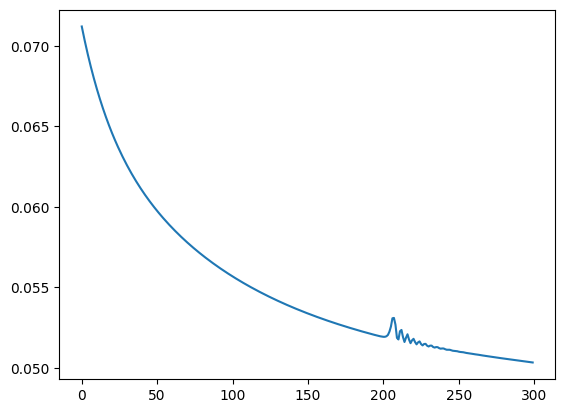

In [ ]:
plt.plot(range(epochs), losses)

In [ ]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [ ]:
loss

tensor(0.0141)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')

1.) tensor([ 16.2274,   5.5237, -34.6916]) 	 0
2.) tensor([-3.1357,  7.3363, -2.2358]) 	 1
3.) tensor([ 15.5068,   6.1433, -33.4046]) 	 0
4.) tensor([-10.0832,   1.8944,  11.2140]) 	 2
5.) tensor([ 14.9395,   5.7711, -32.2930]) 	 0
6.) tensor([ 18.0521,   5.6432, -38.4566]) 	 0
7.) tensor([-3.0176,  6.4126, -1.6040]) 	 1
8.) tensor([-10.8937,   2.2785,  11.9029]) 	 2
9.) tensor([-7.7755,  4.8051,  5.8350]) 	 2
10.) tensor([ 17.7276,   5.6802, -37.7846]) 	 0
11.) tensor([-7.1381,  3.7399,  5.9811]) 	 2
12.) tensor([-12.1791,   2.1481,  13.7302]) 	 2
13.) tensor([ 14.0791,   5.3738, -30.2576]) 	 0
14.) tensor([-4.0089,  6.2782, -0.3174]) 	 1
15.) tensor([-10.1766,   2.1283,  11.0643]) 	 2
16.) tensor([-3.4293,  6.7806, -1.3682]) 	 1
17.) tensor([-0.4836,  7.9884, -6.1281]) 	 1
18.) tensor([-10.9012,   1.9934,  12.1960]) 	 2
19.) tensor([-1.8525,  7.5070, -4.0377]) 	 1
20.) tensor([-9.3780,  1.8095, 10.3672]) 	 2
21.) tensor([-11.4072,   2.0546,  12.8034]) 	 2
22.) tensor([-0.9255,  8.181